In [1]:
import pandas as pd
import numpy as np

from modules.utils.utils import read_json , initialize_tables_in_db, load_to_postgres, build_connection_engine
from pathlib import Path
import matplotlib.pyplot as plt

p = Path(".")

config = read_json(p / "modules"/"config.json")
table_schema = 'remote'
conn_s = build_connection_engine(config, 's')

In [2]:
dimproduct = pd.read_sql_query(f"select * from remote.dimproduct ",con=conn_s)

df = dimproduct.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ProductKey             569 non-null    float64       
 1   ProductAlternateKey    569 non-null    object        
 2   ProductSubcategoryKey  360 non-null    float64       
 3   WeightUnitMeasureCode  245 non-null    object        
 4   SizeUnitMeasureCode    217 non-null    object        
 5   ProductName            569 non-null    object        
 6   StandardCost           358 non-null    float64       
 7   FinishedGoodsFlag      569 non-null    float64       
 8   Color                  315 non-null    object        
 9   SafetyStockLevel       569 non-null    float64       
 10  ReorderPoint           569 non-null    float64       
 11  ListPrice              358 non-null    float64       
 12  Size                   263 non-null    object        
 13  SizeR

In [6]:
df.groupby('ProductSubcategoryKey').count()

,ProductKey,ProductAlternateKey,WeightUnitMeasureCode,SizeUnitMeasureCode,ProductName,StandardCost,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,...,Weight,DaysToManufacture,ProductLine,DealerPrice,Class,Style,ModelName,StartDate,EndDate,Status
ProductSubcategoryKey,,,,,,,,,,,,,,,,,,,,,
1.0,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,10,0,10
2.0,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,0,0,0
3.0,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,0,0,0
4.0,14,14,0,0,14,14,14,0,14,14,...,0,14,14,14,14,0,14,14,6,8
5.0,3,3,3,0,3,3,3,0,3,3,...,3,3,0,3,3,0,3,3,0,3
6.0,1,1,1,0,1,1,1,1,1,1,...,1,1,0,1,0,0,1,1,0,1
7.0,1,1,0,0,1,1,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
8.0,3,3,3,0,3,3,3,3,3,3,...,3,3,0,3,3,0,3,3,0,3
9.0,2,2,2,0,2,2,2,2,2,2,...,2,2,0,2,0,0,2,2,0,2


In [7]:
df.StartDate.notna().sum()

437

In [12]:
df.groupby('ProductKey', as_index = False)['ProductAlternateKey'].count()

,ProductKey,ProductAlternateKey
0,1.0,1
1,2.0,1
2,3.0,1
3,4.0,1
4,5.0,1
...,...,...
564,602.0,1
565,603.0,1
566,604.0,1
567,605.0,1


(array([135.,  63.,  15.,  30.,  10.,  19.,  32.,   9.,   2.,   4.,   6.,
          5.,   5.,  11.,   5.,   0.,   0.,   4.,   0.,   3.]),
 array([8.56500000e-01, 1.09378385e+02, 2.17900270e+02, 3.26422155e+02,
        4.34944040e+02, 5.43465925e+02, 6.51987810e+02, 7.60509695e+02,
        8.69031580e+02, 9.77553465e+02, 1.08607535e+03, 1.19459723e+03,
        1.30311912e+03, 1.41164101e+03, 1.52016289e+03, 1.62868477e+03,
        1.73720666e+03, 1.84572855e+03, 1.95425043e+03, 2.06277231e+03,
        2.17129420e+03]),
 <BarContainer object of 20 artists>)

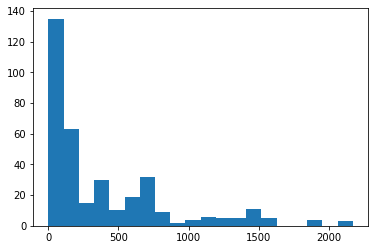

In [19]:
df[['StandardCost']].describe()
plt.hist(df.StandardCost, 20)

(array([130.,  64.,   4.,  41.,  14.,  12.,  20.,  28.,   2.,   4.,   0.,
          6.,  10.,  16.,   0.,   0.,   0.,   0.,   2.,   5.]),
 array([1.3740000e+00, 1.0865340e+02, 2.1593280e+02, 3.2321220e+02,
        4.3049160e+02, 5.3777100e+02, 6.4505040e+02, 7.5232980e+02,
        8.5960920e+02, 9.6688860e+02, 1.0741680e+03, 1.1814474e+03,
        1.2887268e+03, 1.3960062e+03, 1.5032856e+03, 1.6105650e+03,
        1.7178444e+03, 1.8251238e+03, 1.9324032e+03, 2.0396826e+03,
        2.1469620e+03]),
 <BarContainer object of 20 artists>)

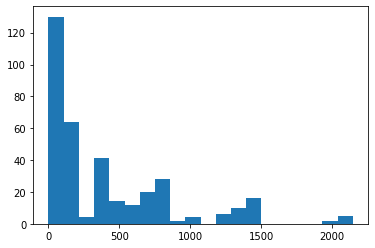

In [20]:
df[['DealerPrice']].describe()
plt.hist(df.DealerPrice, 20)

,StandardCost
count,358.000000
mean,395.955686
std,473.221466
min,0.856500
25%,30.933400
50%,187.157100
75%,605.649200
max,2171.294200
